In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv")


In [2]:
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(info_A1)

# Identify numeric and string columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
string_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Create a DataFrame with the cluster
clusters_df = pd.DataFrame(data=clusters, columns=['Cluster'])

# Create a DataFrame from the scaled numeric data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Concatenate the string columns, scaled numeric data, and cluster labels for visualization purposes
reskm_df = pd.concat([df_cleaned[string_cols], scaled_df, clusters_df], axis=1)

# Display the resulting DataFrame
print(reskm_df.head())



  prov_char country_char               wavenumber tgp_name dgp_name fgp_name  \
0       BBX           ID  ID-BBX-068-2307-031_001  Group 3  Group 2  Group 3   
1       BBX           ID  ID-BBX-068-2307-031_002  Group 3  Group 2  Group 3   
2       BBX           ID  ID-BBX-068-2307-031_003  Group 3  Group 2  Group 3   
3       BBX           ID  ID-BBX-068-2307-031_004  Group 3  Group 2  Group 3   
4       BBX           ID  ID-BBX-068-2307-031_005  Group 3  Group 2  Group 3   

  country_name thnoth_name   649.893   650.376  ...  3996.265  3996.747  \
0    Indonesia    Non-Thai  0.419113  0.667797  ... -0.240307 -0.188715   
1    Indonesia    Non-Thai -0.323020 -0.511771  ... -0.047280 -0.007774   
2    Indonesia    Non-Thai  0.376486  0.419029  ... -0.129120 -0.099932   
3    Indonesia    Non-Thai -0.448123 -0.647960  ...  0.317544  0.348502   
4    Indonesia    Non-Thai -0.219276 -0.418433  ...  0.549206  0.551155   

    3997.23  3997.712  3998.194  3998.676  3999.158   3999.64  4000.

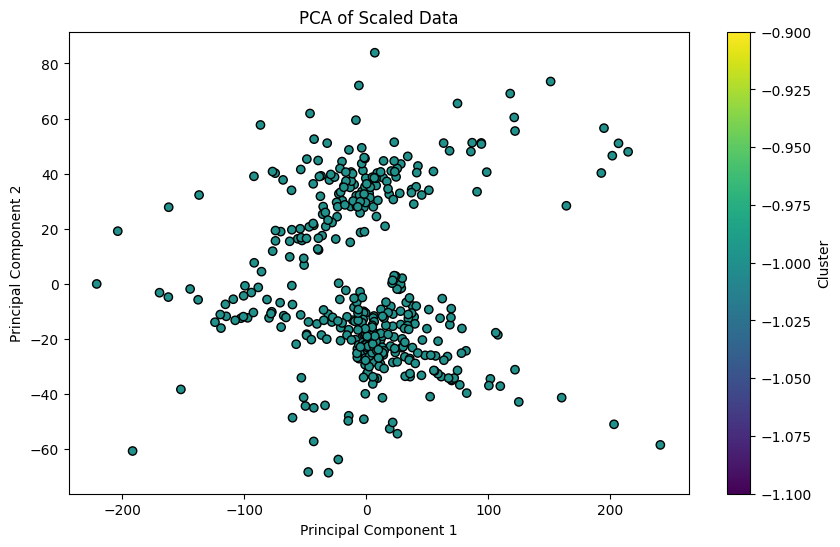

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components to keep (you can adjust this number)
n_components = 2

# Perform PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Concatenate the string columns for visualization purposes
result_df = pd.concat([df_cleaned[string_cols], pca_df], axis=1)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled Data')
plt.colorbar(label='Cluster')
plt.show()


In [4]:
print(result_df)

    prov_char country_char               wavenumber tgp_name dgp_name  \
0         BBX           ID  ID-BBX-068-2307-031_001  Group 3  Group 2   
1         BBX           ID  ID-BBX-068-2307-031_002  Group 3  Group 2   
2         BBX           ID  ID-BBX-068-2307-031_003  Group 3  Group 2   
3         BBX           ID  ID-BBX-068-2307-031_004  Group 3  Group 2   
4         BBX           ID  ID-BBX-068-2307-031_005  Group 3  Group 2   
..        ...          ...                      ...      ...      ...   
410       TRG           TH  TH-TRG-012-2312-004_005  Group 2  Group 1   
411       TRG           TH  TH-TRG-012-2312-004_006  Group 2  Group 1   
412       TRG           TH  TH-TRG-018-2311-001_001  Group 2  Group 1   
413       TRG           TH  TH-TRG-018-2311-001_002  Group 2  Group 1   
414       TRG           TH  TH-TRG-018-2311-001_003  Group 2  Group 1   

    fgp_name country_name thnoth_name  Principal Component 1  \
0    Group 3    Indonesia    Non-Thai             -43.02950

In [5]:
pca_df

,Principal Component 1,Principal Component 2,Cluster
0,-43.029505,-44.974328,-1
1,-33.824228,-44.094287,-1
2,-49.870527,-44.311995,-1
3,-14.415908,-47.861939,-1
4,-14.818443,-49.726894,-1
...,...,...,...
410,202.903150,-50.957163,-1
411,240.842125,-58.432056,-1
412,8.274376,24.447955,-1
413,-1.529196,18.917265,-1


In [6]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

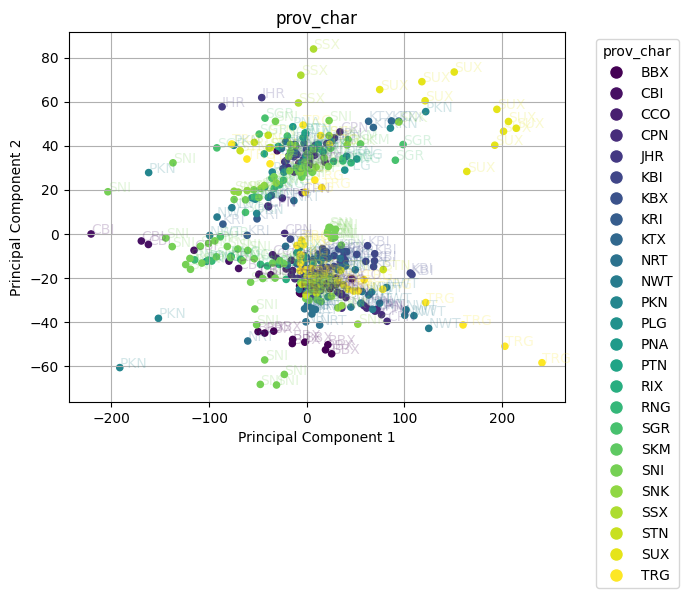

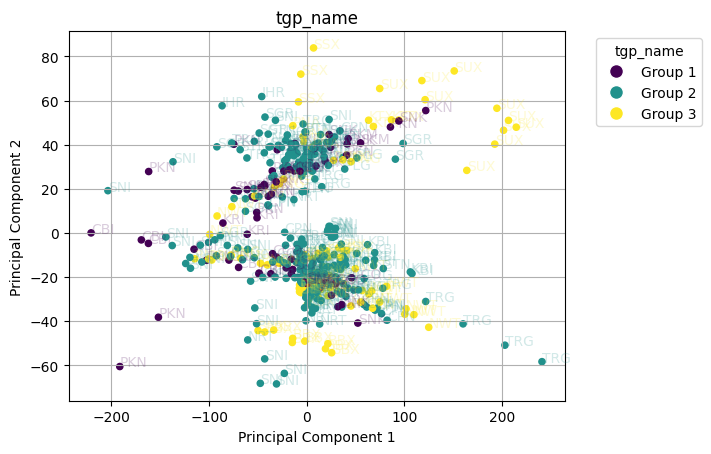

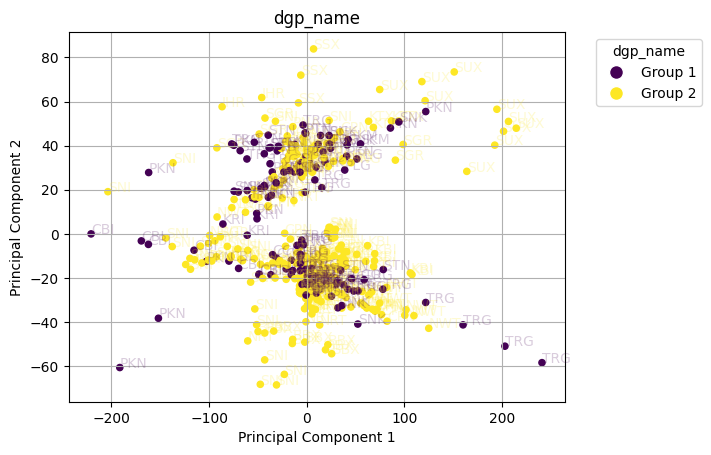

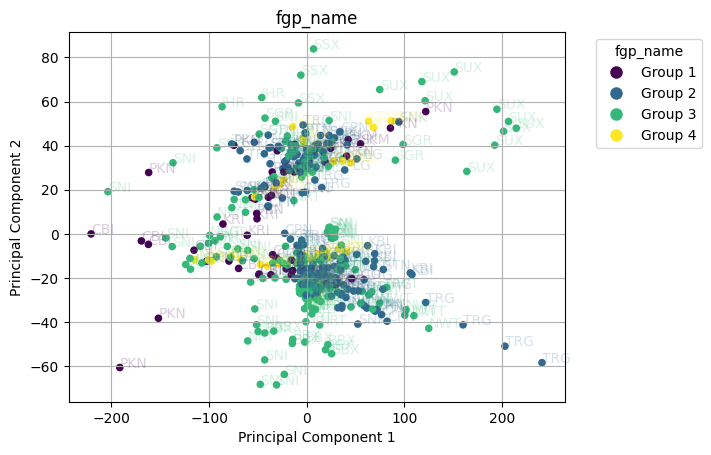

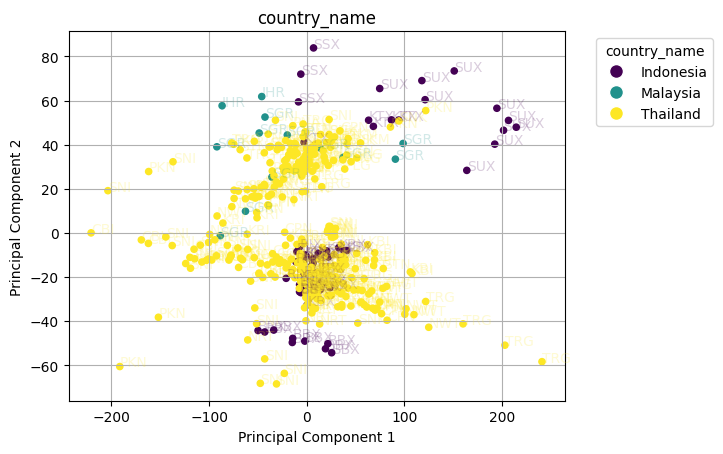

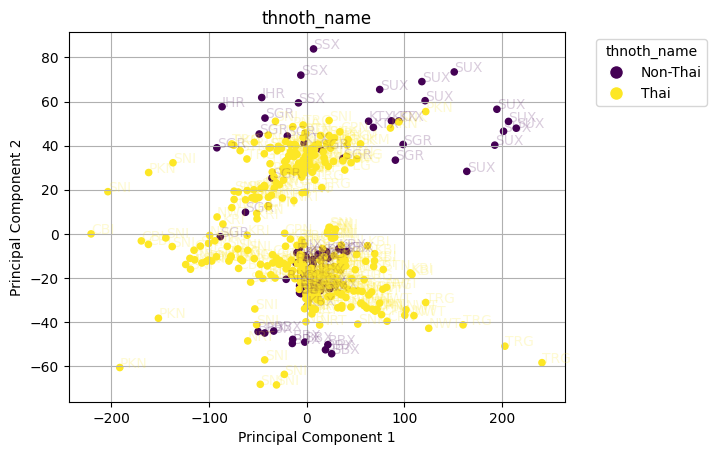

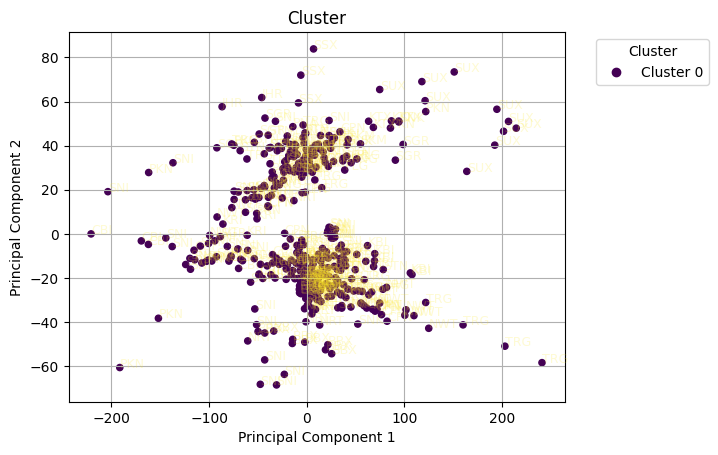

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in range(len(string_cols)):
    encoded_categories = label_encoder.fit_transform(result_df[string_cols[i]])
    if i == 1:
        continue
    if i == 2:
        continue
    
    encoded_categories = label_encoder.fit_transform(result_df[string_cols[i]])
    
    # Create the scatter plot
    scatter = plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'], 
                          c=encoded_categories, cmap='viridis', s=20)
    plt.title(string_cols[i])
    
    # Get the colormap and normalization from the scatter plot
    cmap = scatter.cmap
    norm = scatter.norm
    
    # Annotate points with 'Prov_Char' column
    for j in range(len(result_df)):
        plt.annotate(result_df['prov_char'].iloc[j], 
                     (result_df['Principal Component 1'].iloc[j], result_df['Principal Component 2'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.2)
    

    # Customize the legend to show original string labels
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=string_cols[i], bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.grid(True)
    plt.show()


plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'], c=result_df['Cluster'], cmap='viridis', s=20)
plt.title('Cluster')

# Annotate points with 'Prov_Char' column
for x, y, label, color in zip(result_df['Principal Component 1'], 
                              result_df['Principal Component 2'], 
                              result_df['prov_char'], 
                              result_df['Cluster']):
    plt.text(x, y, label, color=plt.cm.viridis(color / max(result_df['Cluster'])), fontsize=9, alpha=0.2)

# Get handles and labels for the legend
handles, labels = scatter.legend_elements()

# Create cluster labels
unique_clusters = np.unique(result_df['Cluster'])
cluster_labels = [f'Cluster {cluster+1}' for cluster in unique_clusters]

# Update legend labels
updated_labels = [cluster_labels[int(label)] for label in unique_clusters]
plt.legend(handles, cluster_labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()


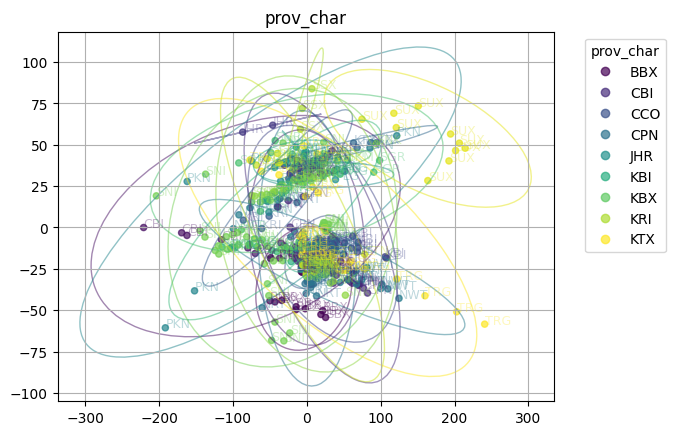

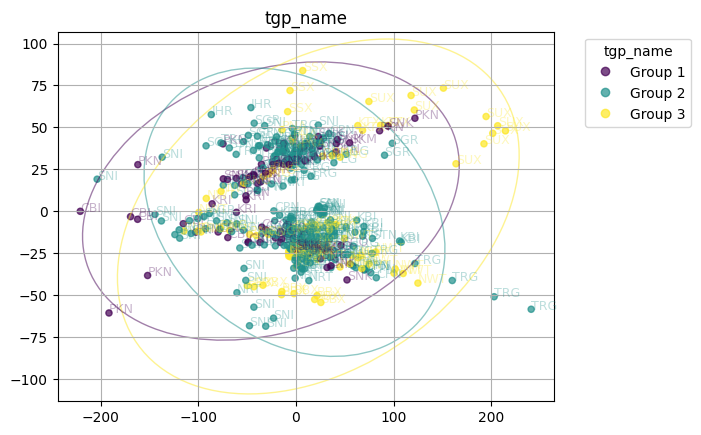

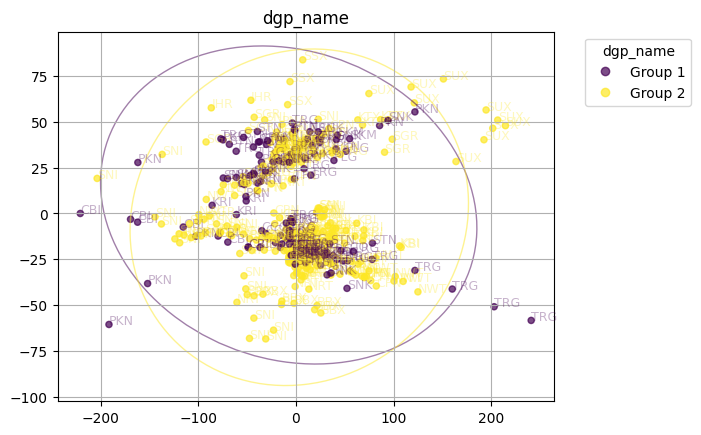

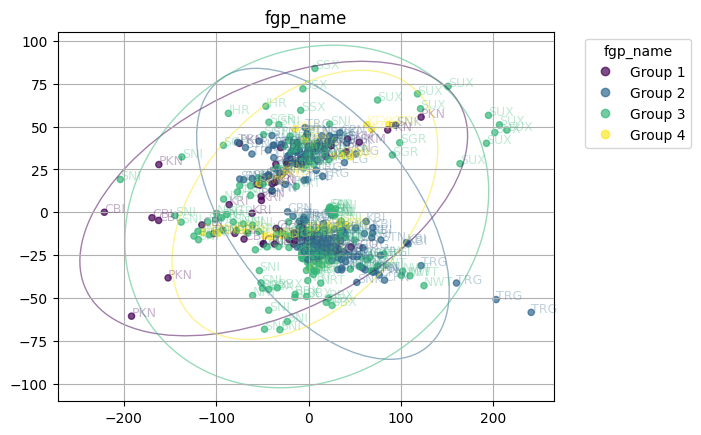

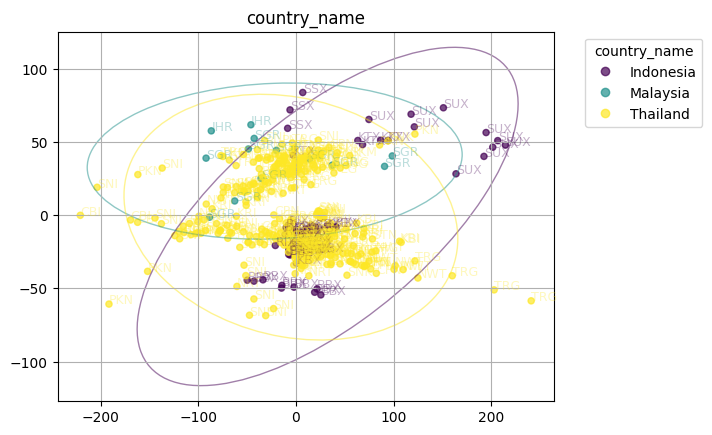

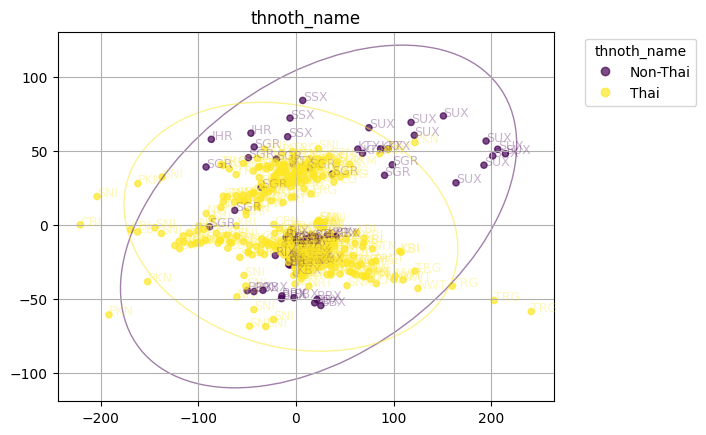

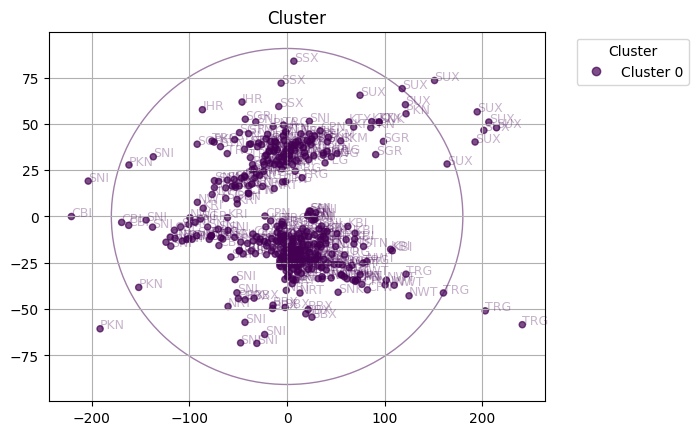

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.preprocessing import LabelEncoder

def plot_confidence_ellipse(ax, x, y, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    mean = [np.mean(x), np.mean(y)]
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)
    
    width, height = 2 * n_std * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta), facecolor=facecolor, **kwargs)
    
    ax.add_patch(ellipse)

label_encoder = LabelEncoder()

for i in range(len(string_cols)):
    if i == 1 or i == 2:
        continue
    
    # Encode categories
    encoded_categories = label_encoder.fit_transform(result_df[string_cols[i]])
    unique_categories = np.unique(encoded_categories)
    category_labels = label_encoder.inverse_transform(unique_categories)
    
    plt.figure()
    
    # Create scatter plot
    scatter = plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'],
                          c=encoded_categories, cmap='viridis', s=20, alpha=0.7)
    plt.title(string_cols[i])
    
    # Add confidence ellipses
    ax = plt.gca()
    cmap = scatter.cmap
    norm = scatter.norm
    for category in unique_categories:
        points = result_df[encoded_categories == category]
        plot_confidence_ellipse(ax, points['Principal Component 1'], points['Principal Component 2'], 
                                n_std=3, edgecolor=cmap(norm(category)), fc='none', alpha=0.5)
    
    # Annotate points with 'prov_char' column
    for x, y, label, color in zip(result_df['Principal Component 1'], 
                                  result_df['Principal Component 2'], 
                                  result_df['prov_char'], 
                                  encoded_categories):
        plt.annotate(label, 
                     (x, y), 
                     color=cmap(norm(color)), fontsize=9, alpha=0.3)
    
    # Get handles and labels for the legend
    handles, _ = scatter.legend_elements()
    
    # Customize the legend to show original string labels
    encoded_to_label = {str(cat): label for cat, label in zip(unique_categories, category_labels)}
    updated_labels = [encoded_to_label[str(int(label))] for label in unique_categories]
    plt.legend(handles, updated_labels, title=string_cols[i], bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True)
    plt.show()

# Plot for 'Cluster'
plt.figure()
scatter = plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'],
                      c=result_df['Cluster'], cmap='viridis', s=20, alpha=0.7)

# Add confidence ellipses
ax = plt.gca()
unique_clusters = np.unique(result_df['Cluster'])
cmap = scatter.cmap
norm = scatter.norm
for cluster in unique_clusters:
    points = result_df[result_df['Cluster'] == cluster]
    plot_confidence_ellipse(ax, points['Principal Component 1'], points['Principal Component 2'], 
                            n_std=3, edgecolor=cmap(norm(cluster)), fc='none', alpha=0.5)

# Annotate points with 'prov_char' column
for x, y, label, color in zip(result_df['Principal Component 1'], 
                              result_df['Principal Component 2'], 
                              result_df['prov_char'], 
                              result_df['Cluster']):
    plt.annotate(label, 
                 (x, y), 
                 color=cmap(norm(color)), fontsize=9, alpha=0.3)

plt.title('Cluster')

# Get handles and labels for the legend
handles, labels = scatter.legend_elements()

# Create cluster labels
cluster_labels = [f'Cluster {cluster+1}' for cluster in unique_clusters]

# Update legend labels
plt.legend(handles, cluster_labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


### Explanation of the Ellipse Function

#### `plot_confidence_ellipse` Function
This function creates and adds a confidence ellipse to a plot, representing the covariance matrix of the given data points.

1. **Inputs:**
   - `ax`: The matplotlib axis object to which the ellipse will be added.
   - `x`, `y`: Arrays of data points for which the ellipse will be drawn.
   - `n_std`: Number of standard deviations to scale the ellipse. This controls the size of the ellipse (default is 1 standard deviation).
   - `facecolor`: The color to fill the ellipse (default is 'none', meaning no fill).
   - `**kwargs`: Additional keyword arguments to customize the appearance of the ellipse (e.g., `edgecolor`, `alpha`).

2. **Process:**
   - **Covariance Calculation:** `cov = np.cov(x, y)` calculates the covariance matrix of the input data points.
   - **Mean Calculation:** `mean = [np.mean(x), np.mean(y)]` computes the mean of the input data points.
   - **Eigenvalues and Eigenvectors:** `eigvals, eigvecs = np.linalg.eigh(cov)` computes the eigenvalues and eigenvectors of the covariance matrix, which represent the principal axes of the ellipse.
     - **Sorting:** `order = eigvals.argsort()[::-1]` ensures the eigenvalues and corresponding eigenvectors are sorted in descending order.
   - **Angle Calculation:** `theta = np.arctan2(vy, vx)` calculates the rotation angle of the ellipse using the first eigenvector.
   - **Ellipse Dimensions:** `width, height = 2 * n_std * np.sqrt(eigvals)` calculates the width and height of the ellipse based on the eigenvalues scaled by the number of standard deviations.
   - **Ellipse Creation:** `Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta), facecolor=facecolor, **kwargs)` creates the ellipse object.

3. **Adding the Ellipse to the Plot:** `ax.add_patch(ellipse)` adds the ellipse to the specified axis.

### Application in Your Code

1. **Scatter Plot Creation:**
   - The scatter plot is created using `plt.scatter`, with points colored according to their encoded categories or clusters.
   - The `cmap` and `norm` from the scatter plot are used to ensure consistency in colors between the scatter points and the ellipse edges.

2. **Adding Confidence Ellipses:**
   - For each unique category or cluster, the `plot_confidence_ellipse` function is called.
   - The function uses the `Principal Component 1` and `Principal Component 2` data points to calculate and draw the ellipses.
   - The ellipse edge color matches the color of the respective category or cluster, ensuring visual consistency.

3. **Annotations and Legends:**
   - Annotations are added to each scatter point to show the 'prov_char' value, with text color matching the scatter point color.
   - Legends are customized to show the original string labels or cluster labels, with corresponding colors.

### Code in Context

```python
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.preprocessing import LabelEncoder

def plot_confidence_ellipse(ax, x, y, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    mean = [np.mean(x), np.mean(y)]
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)
    
    width, height = 2 * n_std * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(theta), facecolor=facecolor, **kwargs)
    
    ax.add_patch(ellipse)

label_encoder = LabelEncoder()

for i in range(len(string_cols)):
    if i == 1 or i == 2:
        continue
    
    # Encode categories
    encoded_categories = label_encoder.fit_transform(result_df[string_cols[i]])
    unique_categories = np.unique(encoded_categories)
    category_labels = label_encoder.inverse_transform(unique_categories)
    
    plt.figure()
    
    # Create scatter plot
    scatter = plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'],
                          c=encoded_categories, cmap='viridis', s=20, alpha=0.7)
    plt.title(string_cols[i])
    
    # Add confidence ellipses
    ax = plt.gca()
    cmap = scatter.cmap
    norm = scatter.norm
    for category in unique_categories:
        points = result_df[encoded_categories == category]
        plot_confidence_ellipse(ax, points['Principal Component 1'], points['Principal Component 2'], 
                                n_std=3, edgecolor=cmap(norm(category)), fc='none', alpha=0.5)
    
    # Annotate points with 'prov_char' column
    for x, y, label, color in zip(result_df['Principal Component 1'], 
                                  result_df['Principal Component 2'], 
                                  result_df['prov_char'], 
                                  encoded_categories):
        plt.annotate(label, 
                     (x, y), 
                     color=cmap(norm(color)), fontsize=9, alpha=0.3)
    
    # Get handles and labels for the legend
    handles, _ = scatter.legend_elements()
    
    # Customize the legend to show original string labels
    encoded_to_label = {str(cat): label for cat, label in zip(unique_categories, category_labels)}
    updated_labels = [encoded_to_label[str(int(label))] for label in unique_categories]
    plt.legend(handles, updated_labels, title=string_cols[i], bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True)
    plt.show()

# Plot for 'Cluster'
plt.figure()
scatter = plt.scatter(result_df['Principal Component 1'], result_df['Principal Component 2'],
                      c=result_df['Cluster'], cmap='viridis', s=20, alpha=0.7)

# Add confidence ellipses
ax = plt.gca()
unique_clusters = np.unique(result_df['Cluster'])
cmap = scatter.cmap
norm = scatter.norm
for cluster in unique_clusters:
    points = result_df[result_df['Cluster'] == cluster]
    plot_confidence_ellipse(ax, points['Principal Component 1'], points['Principal Component 2'], 
                            n_std=3, edgecolor=cmap(norm(cluster)), fc='none', alpha=0.5)

# Annotate points with 'prov_char' column
for x, y, label, color in zip(result_df['Principal Component 1'], 
                              result_df['Principal Component 2'], 
                              result_df['prov_char'], 
                              result_df['Cluster']):
    plt.annotate(label, 
                 (x, y), 
                 color=cmap(norm(color)), fontsize=9, alpha=0.3)

plt.title('Cluster')

# Get handles and labels for the legend
handles, labels = scatter.legend_elements()

# Create cluster labels
cluster_labels = [f'Cluster {cluster+1}' for cluster in unique_clusters]

# Update legend labels
plt.legend(handles, cluster_labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()
```

### Summary:
This code will plot scatter points with color-coded categories or clusters, annotate the points with a specified label, and draw confidence ellipses around each category or cluster, with ellipse colors matching the scatter points. The legend is customized to reflect the correct labels and colors.